# Machine Learning and Statistics - Tasks
Assignment Tasks for Machine Learning and Statistics, GMIT 2020

Lecturer: dr Ian McLoughlin


>Author: **Andrzej Kocielski**  
>Github: [andkoc001](https://github.com/andkoc001/)  
>Email: G00376291@gmit.ie, and.koc001@gmail.com


___
## Introduction

This notebook forms a part of assignment to the Machine Lerning and Statistics module.

The notebook consist of discussion on four problems (tasks):

* Task 1 - Print on screen the square root of 2 to 100 decimal places, without use of external libraries.
* Task 2 - Verify the value of the $ 𝜒2 $ (chi-squared) test for a sample dataset and calculate the associated $ 𝑝 $ value.
* Task 3 - Simulate Excel function STDEC.S and STDEV.P using Numpy and explain advantages of the former.
* Task 4 - Apply k-means clustering algorithm to _Fisher's Iris_ data set using scikit-learn.

Detailed tasks description is available in the [assessment.pdf](https://github.com/andkoc001/Machine-Learning-and-Statistics/blob/main/assessment.pdf) file.

This Notebook should be read in conjunction with the corresponding `README.md` file at the project [repository](https://github.com/andkoc001/Machine-Learning-and-Statistics.git) at GitHub.

___
# Task 1

### Objectives
__Print on screen the square root of 2 to 100 decimal places, without use of external libraries__.

Write a Python function called `sqrt2` that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise.

### Division of a range method

For any real number $ x $, that $ x > 1 $:

$$ \sqrt{x} \cdot \sqrt{x} = x $$

$$ 1 < \sqrt{x} < x $$

The last equation is an equivalent to $ 1^2 < x < x^2 $.


Hence, it is possible to approximate the value of $ \sqrt{x} $ by iteratively testing into which of the halves of the original range will it fall. This is done by performing the test: 

$$ (\sqrt{x})^2 < (\frac{1+x}{2})^2 $$

Then in the next iteration new boundary conditions are assumed. If the test is true, $ \frac{1+x}{2} $ becomes the right boundary; if the test is false, $ \frac{1+x}{2} $ becomes the left boundary. This way, the range tightens at each iteration. 


___
Example for $ x = 2 $:

The initial conditions is this: $ 1^2 < (\sqrt{2})^2 < 2^2 $.

In the first iteration, the left boundary is $ 1^2 = 1 $, and the right boundary is $ 2^2 = 4 $. 

Then we perform the test: $ (\frac{1+2}{2})^2 = 2.25 $, which is greater than $ (\sqrt{2})^2 = 2 $.  

Therefore, in the second iteration the left boundary remains $ 1^2 = 1 $, and the right boundary becomes $ \frac{1+2}{2} = 1.5 $.

We do the test again: $ (\frac{1+1.5}{2})^2 = 1.5625 $. This is less than $ (\sqrt{2})^2 = 2 $. 

In the third iteration the left boundary becomes $ \frac{1+1.5}{2} = 1.25 $, and the right boundary stays $ \frac{1+2}{2} = 1.5 $.

We do the test again: $ (\frac{1.25+1.5}{2})^2 = 1.890625 $. This is less than $ (\sqrt{2})^2 = 2 $. 

In the forth iteration the left boundary becomes $ \frac{1.25+1.5}{2} = 1.375 $, and the right boundary stays $ \frac{1+2}{2} = 1.5 $.

And so on...
___

This process may continue until required precision is achieved. 

For Python built-in data types, _while_ loop may govern the precision improvement process. However, Python allows only precision only to 15 digits precision.

Let's designate the required precision as $ \tau $. As long as $ (\frac{1+x}{2})^2 >= \tau $, the required precision is not achieved and another iteration is to be performed.

In [1]:
# Define number of which sqare root will be approximated
number = 2

# Define decimal places precision
precision = 15 # fiveteen decimal places appears to be the maximum for this data type

# Initial boundary conditions:
left = 1
right = number
middle = (left+right) / 2

# Implementing the logic
iteration = 0 

# Loop exit condition, i.e. requested precision is achieved
while abs(number-middle*middle) >= 10**-precision:
    
    # Testing which half of the range the square root of the number will fall into; tightening the boundaries
    if middle*middle > number:
        # if the condition is satisfied, the right boundary is changed to the previous mid-point
        right = middle
        
    else:
        # if the condition is not satisfied, the left boundaries is changed to the previous mid-point
        left = middle
    
    # Update the value of the variable 'middle'
    middle = (left+right) / 2
    
    # Update number of iteration
    iteration = iteration + 1

    # Print out intermediate results for each iteration
    # print(f"Iteration {iteration:3}, left: {left:18}, Sqare root: {middle:.16}, \tright: {right:18}")


# Print out the result
print(f"Iteration {iteration:3}, The sqare root of {number}: {middle:.16}")  


Iteration  49, The sqare root of 2: 1.414213562373095


### Binary shift with Newton's method
Adapted from https://stackoverflow.com/a/28151578

> `>> 1` is a bit-wise right shift, e.g. "divide by 2", `>> 2` would be "divide by 4", `>> n` is "divide by 2**(n)" - https://stackoverflow.com/users/118068/marc-b

In [2]:
### Method C - Newton's method
# Adapted from https://stackoverflow.com/a/28151578# Adapted from https://stackoverflow.com/a/28151578
''' Long integer square roots. Newton's method.
    Written by PM 2Ring. Adapted from C to Python 2008.10.19
'''

# the algorithm

def root(m):
    
    # Get initial approximation
    n, a, k = m, 1, 0
    
    while n > a:
        n >>= 1
        a <<= 1
        k += 1
        #print('\', k, ':', n, a) # for debugging

    # Go back one step & average
    a = n + (a>>2)
    
    #print(a) # for debugging

    # Apply Newton's method
    
    while k:
        a = (a + m // a) >> 1
        k >>= 1
        #print(k, ':', a) # for debugging
    
    result = a
    return result

# body of the main function
def main():
    
    # number to be square rooted, between 1 and 99 - outside the range there is possible error notation, beyond the scope of this task
    number = 2
    
    # number of decimal places to be shown
    precision = 100
    
    factor  = 10 ** (number * precision)
    m =  number * factor
    
    # print the result converted to a string
    string_result = str(root(m))
    
    # Check if the number is in the requested range
    if 1 <= number < 100:
        
        # take the first digit followed by a dot
        result = string_result[0:1] + "."
        
        # take the remaining digits up to set precision
        for i in string_result[1:precision]:
            result = result + i
    
        print("The Square Root of " + str(m/factor) + ":")
        print(result)
                
    else:
        print("Choose number to be squared between 1 and 99")
        
# execute only if run as a script
if __name__ == '__main__':
    main()

The Square Root of 2.0:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Square root by subtraction method

In [3]:
# The algorithm "Square root by subtraction" by Frazer Jarvis, can be found here: http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf

# Adapted from https://www.mathblog.dk/project-euler-80-digits-irrational-square-roots/

def Squareroot(n, prec):

    # Set the required parameters
    limit = 10**(prec+1) # extra precision to avoid rounding error
    left = 5 * n
    right = 5
 
    while right < limit:
        
        if left >= right:
            left -= right
            right += 10
            
        else:
            left *= 100
            right = 10 * right - 45;
       
    return right;



# body of the main function
def main():
    
    # number to be square-rooted, between 1 and 99 - outside the range there is possible error notation, beyond the scope of this task
    number = 2
    
    # number of decimal places to be shown
    precision = 100
    
    # call the main algorithm and print the result converted to a string
    string_result = str(Squareroot(number, precision))
    
    # Check if the number is in the requested range
    if 1 <= number < 100:
        
        # take the first digit followed by a dot
        result = string_result[0:1] + "."
        
        iteration = 0      
        # take the remaining digits up to set precision
        for i in string_result[1:precision]:
            result = result + i
            iteration += 1
            # print(f"Iter: {iteration:3}: {result}") # for debugging
               
        print(len(result))
        print("The Square Root of " + str(number) + ":")
        print(result)
                
    else:
        print("Choose number to be squared between 1 and 99")
        
        
        
# execute only if run as a script
if __name__ == '__main__':
    main()

101
The Square Root of 2:
1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641572


### Result verification
The above result can be checked against the approximation of $\sqrt{2}$ available, amoong others, at https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil. Here, the first 102 digits (including that on the left of the decimal) is shown:

$ \sqrt{2} $= 1.4142 13562  37309 50488  01688 72420  96980 78569  67187 53769  48073 17667  97379 90732  47846 21070  38850 38753  43276 41572 73 

___
### References - Task 1 related

- Ian McaLoughlin - Introduction to the task #1, 2020 [online]. Available at <https://github.com/ianmcloughlin/playing-with-jupyter/blob/main/playing-with-jupyter.ipynb> [Accessed October 2020]
- Taylor series - Wikipedia. [online] Available at: <https://en.wikipedia.org/wiki/Taylor_series> [Accessed October 2020].
- Mateusz Kowalski - Matematyka, Wzór Taylora i Maclaurina, Przybliżanie Funkcji (in Polish) [online]. Available at: http://www.kowalskimateusz.pl/matematyka-wzor-taylora-i-maclaurina-przyblizanie-funkcji/ [Accessed October 2020]
- The Penn Calc Wiki, Taylor Series [online]. Available at: <http://calculus.seas.upenn.edu/?n=Main.TaylorSeries> [Accessed October 2020]
- NASA - Square root of 2 - the first million digits [online]. Available at: <https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil> [Accessed October 2020]
- Python manual on Decimal library [online]. Available at: <https://docs.python.org/3/library/decimal.html> [Accessed October 2020]
- Python manual on BitwiseOperations [online]. Available at: <https://wiki.python.org/moin/BitwiseOperators> [Accessed October 2020]
- Stack Overflow - find as many digits of the square root of 2 as possible [online]. Available at: <https://stackoverflow.com/a/15434306> [Accessed October 2020]
- Frazer Jarvis, 2005 - Square root by subtraction [pdf]. Available at: <http://www.afjarvis.staff.shef.ac.uk/maths/jarvisspec02.pdf> [Accessed October 2020]

___
# Task 2 - Chi-square test of independence


### Objectives
__Verify the value of the $ {\chi}^2 $ (chi-squared) test for a sample dataset and calculate the associated $ p $ value__.

Use `scipy.stats` to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.


### The Chi-squared test

The chi-squared test is a statistical tool suitable for categorical data values (for instance, colour or academic degree or dog breeds). It can be used for three applications, although in essence they test similar things: 1) the goodness of fit test (how one category data fits the distribution), 2) test for homogeneity (liekehood of different samples coming from the same population) and 3) test of independence. [YouTube](https://www.youtube.com/watch?v=7_cs1YlZoug). 

For this task, Chi-squared **Test of independence** applies. Test of independence attempts to answer whether being a member of one category is independent of another is statistically significant. In other words, "the chi-square independence test is a procedure for testing if two categorical variables are related in some population." [SPSS Tutorials](https://www.spss-tutorials.com/chi-square-independence-test/)

The calculation compares the measured (observed) values against the expected values (if the null hypothesis is true).

The result of the chi-squared test is a numerical value that can be interpreted in such a way that it allows for seeing whether one variable is independent of another.

A generic form of the test is like this (from [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_tes)):

$$ {\chi}^2 = \sum_{k=1}^{n} \frac{(O_k - E_k)^2}{E_k}\ $$

where:  
$ n $ - number of categories,  
$ O $ - measurement from observation,  
$ E $ - expected value if the null hypothesis is true.

It is also worth noting that, in order to render the independence test viable, the expected value $ E_k > 5 $. Although that value is assumed arbitrarily, it is commonly used for practical application (-----quote source here).

Also 'degrees of freedom' is required for assessing the independence test. The general formula for the degrees of freedom for tabularised data is as follows:

$$ df = (r-1)(c-1) $$
    
where:  
$ df $ - degrees of freedom,  
$ r $ - number of rows,  
$ c $ - number of columns.

The degree of freedom will affect the chi-squared distribution. Sample plots for various degrees of freedom are shown below.


![Chi-squared distribution](https://saylordotorg.github.io/text_introductory-statistics/section_15/5a0c7bbacb4242555e8a85c9767c03ee.jpg) Image source: [Saylor Academy](https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html)

"The value of the chi-square random variable $ {\chi}^2 $ with degree of freedom $ df = k $ that cuts off a right tail of area c is denoted $ {\chi}^2_c $ and is called a critical value." [Saylor Academy](https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html)

![Chi-squared critical value](https://saylordotorg.github.io/text_introductory-statistics/section_15/34d06306c2e726f6d5cd7479d9736e5e.jpg) Image source: [Saylor Academy](https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html)



### The problem

This task is to evaluate the given example data along the Chi-squared test result also already given. "The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia [article](https://en.wikipedia.org/wiki/Chi-squared_test) gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use `scipy.stats` to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell."

The data from the above Wikipedia page, describes the test scenario as follows. "Suppose there is a city of 1,000,000 residents with four neighborhoods: A, B, C, and D. A random sample of 650 residents of the city is taken and their occupation is recorded as "white collar", "blue collar", or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data is provided in a form of a contingency table as([Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_test)):

|              |  A  |  B  |  C  |  D  | Total |
|--------------|-----|-----|-----|-----|-------|
| White collar |  90 |  60 | 104 |  95 |  349  |
| Blue collar  |  30 |  50 |  51 |  20 |  151  |
| No collar    |  30 |  40 |  45 |  35 |  150  |
|              |     |     |     |     |       |
| Total        | 150 | 150 | 200 | 150 |  650  |

The chi-squared test of independence verifies whether or not two categorical variables are independent of each other (statistically meaningful). The test assumes the 'null hypothesis' and the opposing 'alternative hypothesis'.

For the given sample data, the hypotheses are as follows (from the Wikipedia article):

**Null hypothesis** $ H_0 $ - "each person's neighborhood of residence is independent of the person's occupational classification",

**Alternative hypothesis** $ H_a $ - there is such a dependency.

The result of the test is already given in Wikipedia article: $ {\chi}^2 $ = 24.6, and so is the degrees of freedom: $ df $ = 6.


### Calculation

The chi-squared test of independence for the provided data is calculated using the statistical functions (`scipy.stats`) from [Scipy](https://docs.scipy.org/doc/scipy/reference/stats.html) library for Python.



In [1]:
# import required libraries
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
# input the observed data manually
data = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])


In [3]:
# perform the calculation of the chi-square test of independence
chi2_contingency(data)

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

### The results and conclusion

The test of independence verifies whether or not there is a statistically meaningful relationship between categorical data. 

The above calculated results are shown below - the chi-square and the degrees of freedom results are in accord with the information provided in the [Wikipedia](https://en.wikipedia.org/wiki/Chi-squared_tes) page. 

$ {\chi}^2 \approx 24,6 $  
$ df = 6 $  
$ p \approx 0.00041 $  

Expected values:

|              |   A   |   B   |   C   |   D   |
|--------------|-------|-------|-------|-------|
| White collar |  80.5 |  80.5 | 107.4 |  80.5 | 
| Blue collar  |  34.8 |  34.8 |  46.5 |  34.8 |
| No collar    |  34.6 |  34.6 |  46.1 |  34.6 |
|              |       |       |       |       |
| Total        | 149.9 | 149.9 | 200.0 | 149.9 |


From the data provided by the survey and the calculated results, where the value of the chi-square is relatively large and the p-value is relatively small, we can infer that there is not evidence strong enough to support the null hypothesis statement ([NIST/SEMATECH](https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm)). The distribution of the occupational classification is due to the relationship between the person's neighborhood of residence and the person's occupational classification. In other words, there is relationship between the two categorical variables - they are dependent.


___
### References - Task 2 related

- Ian McaLoughlin - Introduction to the tasks, 2020 [online]. Available at <https://github.com/ianmcloughlin/playing-with-jupyter/blob/main/playing-with-jupyter.ipynb> [Accessed October 2020]
- Chi-squared test - Wikipedia contributors [online]. Available at: <https://en.wikipedia.org/wiki/Chi-squared_test> [Accessed October 2020].
- Chi-squared test - Wolfram MathWorld contributors. [online] Available at: <https://mathworld.wolfram.com/Chi-SquaredTest.html> [Accessed October 2020].
- Chi-squared test of independence - SPSS Tutorials [online]. Available at: <https://www.spss-tutorials.com/chi-square-independence-test/> [Accessed November 2020]
- Chi-squared test of independence - Stat Trek [online]. Available at: <https://stattrek.com/chi-square-test/independence.aspx> [Accessed November 2020]
- How the Chi-Squared Test of Independence Works - Statistics by Jim [online]. Available at: <https://statisticsbyjim.com/hypothesis-testing/chi-squared-independence/> [Accessed November 2020]
- Chi-kwadrat - Statystyka pomoc [online]. Available at: <http://statystyka-pomoc.com/Chi-kwadrat.html> [Accessed November 2020]  
- A Gentle Introduction to the Chi-Squared Test for Machine Learning [online]. Available at: <https://machinelearningmastery.com/chi-squared-test-for-machine-learning/> [Accessed November 2020]
-Saylor Academy - Introductory statistics, Chi-Square Tests for Independence [online]. Available at: <https://saylordotorg.github.io/text_introductory-statistics/s15-01-chi-square-tests-for-independe.html> [Accessed November 2020]
- CrashCourse - Chi-Square Tests: Crash Course Statistics (YouTube), [online] <https://www.youtube.com/watch?v=7_cs1YlZoug> [Accessed November 2020]
- Lisa Dierker - Chi-square test - Python (YouTube), [online] Available at: <https://www.youtube.com/watch?v=Pbo7VbHK9cY> [Accessed November 2020]
- Statistical functions (scipy.stats) - Scipy documentation [online]. Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed November 2020]
- Joshua Cowley - Chi-Square Distribution Table [pdf] Available at: <http://kisi.deu.edu.tr/joshua.cowley/Chi-square-table.pdf> [Accessed November 2020]
- NIST/SEMATECH e-Handbook of Statistical Methods - Critical Values of the Chi-Square Distribution [online] Available at: <https://www.itl.nist.gov/div898/handbook/eda/section3/eda3674.htm> [Accessed November 2020]

___
# Task 3 - Standard Deviation


### Objectives
__Simulate Excel function `STDEC.S` and `STDEV.P` using Numpy and explain advantages of the former.__

Use NumPy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample.


### Standard deviation

_Standard deviation_ (SD) is a statistical concept, with a wide range of application, to measure how the data is spread out around the mean. [Dictionary.com](https://www.dictionary.com/browse/standard-deviation) defines it as "a measure of dispersion in a frequency distribution, equal to the square root of the mean of the squares of the deviations from the arithmetic mean of the distribution."

The standard deviation is defined as a square root of the average of the squared differences from the Mean [Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation.html).

![Standard Deviation](https://upload.wikimedia.org/wikipedia/commons/f/f9/Comparison_standard_deviations.svg) Image source: [Wikipedia](https://simple.wikipedia.org/wiki/File:Comparison_standard_deviations.svg)

  

### Population and sample SD

There are two main methods of calculating the standard deviation. One that refers to the entire population and the other that consider the data set as a sample of the population. For simplicity, only discrete values are consider in this notebook.

The **standard deviation of population** ($\sigma$), is a measure that could be accurately calculated if the values of the variable were known for all population units; corresponds to the deviation of a random variable whose distribution is identical to the distribution in the population. This kind of standard deviation is often referred as to unbiased or uncorrected.

The the formula for population standard deviation ([Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation-formulas.html)):
$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^n (x_i - \mu)^2}
$$
where:  
$N$ is the size of the population,
$x_i$ represents the observed value of the i-th member,
$\mu$ denotes population mean.

The **standard deviation of sample** ($s$), is a measure that estimates the standard deviation in a population based on the knowledge of only some of its objects, i.e. the random sample. For practical reasons this method is often the only viable option. This kind of standard deviation is often referred as to biased or corrected.

The the formula for sample standard deviation ([Mathisfun.com](https://www.mathsisfun.com/data/standard-deviation-formulas.html)):
$$
s = \sqrt{\frac{1}{N-1} \sum_{i=1}^n (x_i - \bar{x})^2}
$$
where $\bar{x}$ denotes sample mean.

The Microsoft Excel's functions `STDEC.S` and `STDEV.P` are used to calculate standard deviation of **sample** and **population** respectively.

### Standard deviation in NumPy 

NumPy library for Python allows for calculating the standard deviation The function `numpy.std()` is used for this purpose. The syntax employed for the calculation takes the following form:  
`std = sqrt(mean(abs(x - x.mean())**2))`  
where x is value of an observation.

NumPy allows for calculating the standard deviation both of population and of sample. The correction is controlled by the function parameter `ddof`, which by default equals zero (standard deviation of population).

"The average squared deviation is normally calculated as x.sum() / N, where N = len(x). If, however, ddof is specified, the divisor N - ddof is used instead. In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of the infinite population. ddof=0 provides a maximum likelihood estimate of the variance for normally distributed variables. The standard deviation computed in this function is the square root of the estimated variance, so even with ddof=1, it will not be an unbiased estimate of the standard deviation per se" ([NumPy](https://numpy.org/doc/stable/reference/generated/numpy.std.html)).

In [1]:
# import NumPy
import numpy as np

In [2]:
# define the dataset in a form of a two-dimensional array
a = np.arange(10).reshape((2, 5)) # starting from 1
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [3]:
# number of elements in array
n = np.size(a)

In [4]:
# calculate the SD of population 'manually', using formula:
# np.sqrt(np.sum((x - np.mean(x))**2)/len(x))

# auxiliary variable
sum = 0

# iterate over elements of the array
for x in np.nditer(a):
    sum = sum + (x - np.mean(a))**2
    
sd_p = np.sqrt(sum/n)

# print out the result
print(f"Standard deviation of population (calculated manually): {sd_p:.4f}")    

Standard deviation of population (calculated manually): 2.8723


In [5]:
# Standard deviation of population, calculated using NumPy's std() function

# calculate the SD using NumPy's std() function
sd_p_np = np.std(a)
print(f"Standard deviation of population (calculated with NumPy): {sd_p_np:.4f}")

Standard deviation of population (calculated with NumPy): 2.8723


In [6]:
# calculate the SD of sample 'manually', using formula: 
# np.sqrt(np.sum((x - np.mean(x))**2)/len(x-1))

# auxiliary variable
sum = 0

# iterate over elements of the array
for x in np.nditer(a):
    sum = sum + (x - np.mean(a))**2
    
sd_s = np.sqrt(sum/(n-1))

# print out the result
print(f"Standard deviation of population (calculated manually): {sd_s:.4f}")    

Standard deviation of population (calculated manually): 3.0277


In [7]:
# Standard deviation of sample, calculated using NumPy's std() function

# calculate the SD
sd_s_np = np.std(a, ddof=1)
print(f"Standard deviation of sample (calculated with NumPy): {sd_s:.4f}")

Standard deviation of sample (calculated with NumPy): 3.0277


In [8]:
# evaluate the error
err = abs(sd_p - sd_s)/sd_p # in percent
print(f"The error of the standard deviation of a sample is: {err:.2%}") 

The error of the standard deviation of a sample is: 5.41%


### Conclusion 

In the example above, the two methods of calculating the standard deviation produced a difference (error) of approximately 5.41%.

Although standard deviation of the entire population yields an accurate results (every observation is considered), for practical reasons is often not viable (for example, it is hard to imagine taking the height of every person).

Standard deviation of sample yields a biased result. However, for a representative sample (large enough random sample), it is a often a good estimate. The larger the sample, the more accurate estimate.

___
### References - Task 3 related

- Wikipedia Contributors - Standard Deviation [online] Available at: <https://en.wikipedia.org/wiki/Standard_deviation> [Accessed November 2020]
- Tech Book Report - Standard Deviation In 30 Seconds [online] Available at: <http://www.techbookreport.com/tutorials/stddev-30-secs.html> [Accessed November 2020]
- Math is fun - Standard Deviation and Variance [online] Available at: <https://www.mathsisfun.com/data/standard-deviation.html> [Accessed November 2020]
- Microsoft support - STDEV.P function [online] Available at: <https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285> [Accessed November 2020]
- Microsoft support - STDEV.S function [online] Available at: <https://support.microsoft.com/en-us/office/stdev-s-function-7d69cf97-0c1f-4acf-be27-f3e83904cc23> [Accessed November 2020]
- Exceltip - How To Use Excel STDEV.P Function [online] Available at: <https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html> [Accessed November 2020]
- Good Data - Standard Deviation Functions [online] Available at: <https://help.gooddata.com/doc/en/reporting-and-dashboards/maql-analytical-query-language/maql-expression-reference/aggregation-functions/statistical-functions/standard-deviation-functions> [Accessed November 2020]
- NumPy documentation - Standard Deviation (numpy.std) [online] Available at: <https://numpy.org/doc/stable/reference/generated/numpy.std.html> [Accessed November 2020]
- Stack Overflow contributors - STDEV.S and STDEV.P using numpy [online] Available at: <https://stackoverflow.com/questions/64884294/stdev-s-and-stdev-p-using-numpy> [Accessed November 2020]

___
# Task 4 - K-means clustering


### Objectives
__Apply k-means clustering algorithm to Fisher's Iris data set using `scikit-learn`.__

Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species
of iris.



### Fisher's Iris data set

The data set in question is a collection of Iris flowers properties, collated by Roland Fisher.

The data consist of 150 observations, divided into three classes with 50 observations per each class, representing the iris species. Each observation describe measurements from a flower. The collected properties (data set attributes) represent respectively:

- sepal length, cm,
- sepal width, cm,
- petal length, cm,
- petal width, cm,
- species of the iris (Setosa, Versicolour, Virginica). 

The data set for this task has been obtained from the _UC Irvine Machine Learning Repository_, https://archive.ics.uci.edu/ml/datasets/iris. 

### K-means classification algorithm

K-means is one of the unsupervised learning clustering algorithms. It is used to categorise elements into groups (clusters) based on the elements properties values. 

The aggregation is carried out based on the initial arbitrary division of the population into a specific number (k) of clusters. The process of cluster formation is done iteratively by assigning the elements to clusters. Each cluster is represented by a cluster centre that is the vector of mean attribute values of training instances. Cluster modeling in is typically done by applying the distance function to match instances against cluster centers [IBM.com](https://www.ibm.com/support/producthub/iias/docs/content/SSHRBY/com.ibm.swg.im.dashdb.analytics.doc/doc/r_kmeans_clustering.html). The belonging of an element to the clusters is based on the shortest distance to the cluster centre. 

The aim of the technique is to the maximise the similarity of elements in each of the clusters while maximising the difference between the clusters.

The typical steps of the k-means algorithm ([Statystyka.az.pl](https://www.statystyka.az.pl/analiza-skupien/metoda-k-srednich.php)):
1. Determine the number of clusters.
Typically, the number of clusters is chosen arbitrarily and possibly optimised later for better results.
2. Establish the initial cluster centres.
The cluster centres should be selected in such a way as to maximize cluster distances. One of the methods is to run the algorithm several times, with the cluster centers initially being randomized, and choose the best model.
3. Calculate the distances of objects from the centers of clusters.
This step determines which observations are considered similar and which different from each other. The most commonly used distance is the the square of the distance in Euclidean space.
4. Assign objects to clusters
For a given observation, we compare the distances from all clusters and assign them to the cluster with the closest center.
5. Create new aggregation centers
Most often, the new center of focus is a point whose coordinates are the arithmetic mean of the coordinates of the points belonging to a given cluster.
6. Follow steps 3, 4, 5 until the stop condition is met.
The most common stop condition is the number of iterations given at the beginning, or no object moves between clusters.

K-means algorithm needs data for training. Based on the results, it is possible to predict belonging of other points to the clusters. 
![Classification - training](https://miro.medium.com/max/700/0*Xqmluj4gGNBd8GEC.png)
![Classification - prediction](https://miro.medium.com/max/700/0*wVM7U0bDfuNPLptJ.png)
Image source: [towardsdatascience.com](https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec)

### Application of the k-means 

This section is based on the lecture videos and the `sci-kit learn` tutorial.

In [30]:
# Numerical arrays
import numpy as np

# Data tabularised
import pandas as pd

# Machine learning - KMeans
import sklearn.cluster as skcl

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings for better readibility of the notebook
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# get the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# assign data set to dataframe 'df'
df = pd.read_csv(url, sep=',', names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [26]:
# the first few observations
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


A single data plot is worth thousand of data pints - data set visualisation.

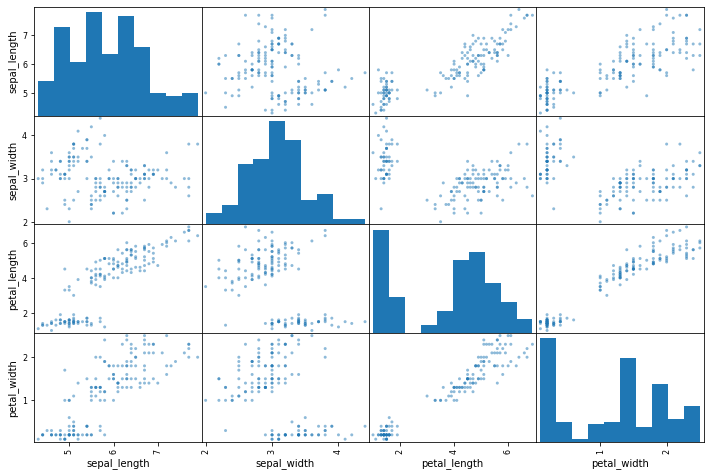

In [42]:
# a glance into the data set plot
pd.plotting.scatter_matrix(df,figsize=(12,8))
plt.show()

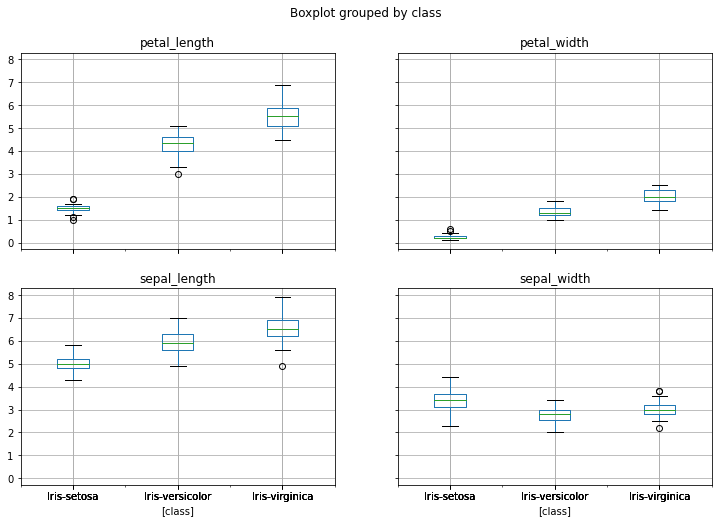

In [41]:
df.set_index("class").boxplot(by="class",figsize=(12,8))
plt.show()

Based on the above, attributes petal length and sepal width appear to discriminate the species best.

Apply k-means, using scikit-learn. 

In [45]:
# Drop the class column, assign new data set to variable X
X = df.drop('class', 1)
X.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [46]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)

In [47]:
# ssign initial the labels of the points.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

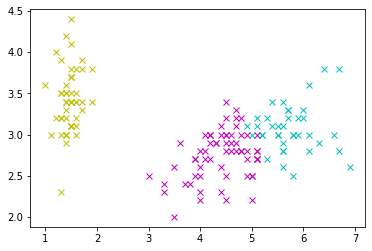

In [71]:
# Plot the data set discriminated by labels.
plt.plot(X[kmeans.labels_ == 0].loc[:,"petal_length"], X[kmeans.labels_ == 0].loc[:,"sepal_width"], 'cx')
plt.plot(X[kmeans.labels_ == 1].loc[:,"petal_length"], X[kmeans.labels_ == 1].loc[:,"sepal_width"], 'yx')
plt.plot(X[kmeans.labels_ == 2].loc[:,"petal_length"], X[kmeans.labels_ == 2].loc[:,"sepal_width"], 'mx')

plt.show()

Compare the result with the actual classification.

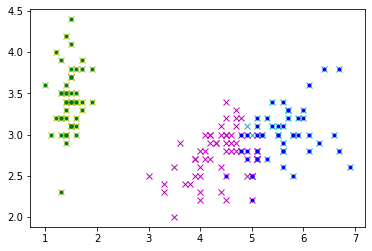

In [83]:
# predicted
plt.plot(X[kmeans.labels_ == 0].loc[:,"petal_length"], X[kmeans.labels_ == 0].loc[:,"sepal_width"], 'cx')
plt.plot(X[kmeans.labels_ == 1].loc[:,"petal_length"], X[kmeans.labels_ == 1].loc[:,"sepal_width"], 'yx')
plt.plot(X[kmeans.labels_ == 2].loc[:,"petal_length"], X[kmeans.labels_ == 2].loc[:,"sepal_width"], 'mx')

# actual
plt.plot(df[df["class"] == "Iris-setosa"].loc[:,"petal_length"], df[df["class"] == "Iris-setosa"].loc[:,"sepal_width"], 'g.')
plt.plot(df[df["class"] == "Iris-versicolour"].loc[:,"petal_length"], df[df["class"] == "Iris-versicolour"].loc[:,"sepal_width"], 'r.')
plt.plot(df[df["class"] == "Iris-virginica"].loc[:,"petal_length"], df[df["class"] == "Iris-virginica"].loc[:,"sepal_width"], 'b.')

plt.show()

___
### References - Task 4 related

https://en.wikipedia.org/wiki/K-means_clustering  
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans  
https://realpython.com/k-means-clustering-python/  
https://www.ibm.com/support/producthub/iias/docs/content/SSHRBY/com.ibm.swg.im.dashdb.analytics.doc/doc/r_kmeans_clustering.html  
https://blogs.oracle.com/datascience/introduction-to-k-means-clustering  
https://towardsdatascience.com/classification-regression-and-prediction-whats-the-difference-5423d9efe4ec  

___
Andrzej Kocielski